# Simulação Monte Carlo para o cálculo do $\pi$ - atividade avançada

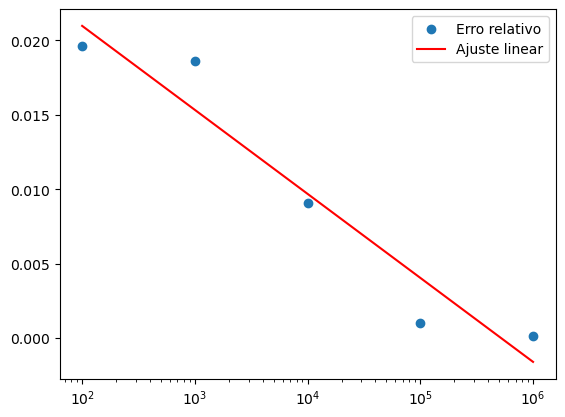

[3.08, 3.2, 3.17, 3.13832, 3.142088]


In [54]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

class CalcPi():
    def __init__(self, pontos = list, retorna_pontos=False):
        self.pontos = pontos
        self.retorna_pontos = retorna_pontos
        self.pontos_internos = []
        self.pontos_externos = []
        self.estimativa_pi = []

    def monte_Carlo_pi(self):
        for i in self.pontos:
            pontos_internos_temp = []   
            pontos_externos_temp = []
            for j in range(i): 
                x= random.uniform(-1,1)  #um float aleatorio entre o intervalo -1 e 1
                y= random.uniform(-1,1)
                if x**2 + y**2 <=1:
                    pontos_internos_temp.append((x,y))
                else:
                    pontos_externos_temp.append((x,y))
            estimativa  = 4 * len(pontos_internos_temp)/ i
            self.estimativa_pi.append(estimativa)


    def  resultado_pi(self):
        self.monte_Carlo_pi()

        if self.retorna_pontos:
            return self.estimativa_pi, self.pontos_internos, self.pontos_externos
        else:
            return self.estimativa_pi
        
    def grafico_pontos_circulo(self):
        r = 1
        theta = np.linspace(0 , 2*np.pi , 1000)
        x1= r* np.cos(theta)
        y1  = r * np.sin(theta)
        plt.figure(figsize=(10, 10))
        plt.plot(x1, y1, color = 'black', label = 'Círculo')
        plt.scatter([x[0] for x in self.pontos_internos], [y[1] for y in self.pontos_internos] , label = 'Pontos internos', s=0.5, alpha=1, color = 'blue')
        plt.scatter([x[0] for x in self.pontos_externos], [y[1] for y in self.pontos_externos] , label = 'Pontos externos', s=0.5, alpha=1, color = 'red')
        plt.title(f'Simulação Monte Carlo para a estimativa de π: {self.estimativa_pi} (pontos = {self.pontos})')
        plt.legend()
        plt.show()

    def grafico_erro_relativo(self):
        log_pontos = np.log10(self.pontos)
        erro  = [abs(pi - np.pi)/np.pi for pi in self.estimativa_pi]
        coeficientes = np.polyfit(log_pontos, erro,1)
        p = np.poly1d(coeficientes)
        plt.scatter(self.pontos, erro , label = 'Erro relativo')
        plt.plot(self.pontos, p(log_pontos), label = 'Ajuste linear', color = 'red')
        plt.xscale('log')
        plt.legend()
        plt.show()



if __name__ == '__main__':
    simulacao1 = CalcPi([100 ,1000, 10000, 100000, 1000000] , False)
    resultado1 = simulacao1.resultado_pi()
    grafico1 = simulacao1.grafico_erro_relativo()
    print(resultado1)
    
   